In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rgb_img = cv2.imread('test_img/rgb.jpg')
depth_img = cv2.imread('test_img/depth.png',cv2.IMREAD_UNCHANGED)

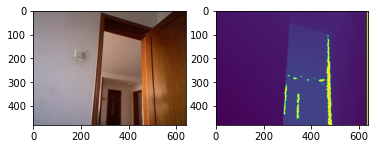

In [3]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(rgb_img[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(depth_img)

In [4]:
class camera():
    def __init__(self):
        self.ir_intrinsic_matrix = np.array(
            [[590.148060671712, 0, 331.776762806745],
             [0, 586.145968930385, 230.802770705792], [0, 0, 1]])
        self.ir_distortion_matrix = np.array([-0.1093, 0.2668, 0, 0, 0])
        self.rgb_intrinsic_matrix = np.array(
            [[539.020832787886, 0, 325.629602617091],
             [0, 534.861253579807, 256.726953726026], 
             [0, 0, 1]])
        self.rgb_distortion_matrix = np.array(
            [0.147555317189259, -0.303342952312001, 0, 0, 0])
        self.R = np.array(
            [[0.999980636769351, -0.006120529301233, -0.001124814400937],
             [0.006107544444555, 0.999918558578594, -0.011205985497267],
             [0.001193309357038, 0.011198898659239, 0.999936578329645]])
        self.A = np.array([[1, 0, 0, -25.96/1000], [0, 1, 0, -0.9825/1000],
                           [0, 0, 1, 4.4076/1000]])
        self.ir_rgb_extrinsic = np.array([[
            0.999980636769351, -0.00612052930123339, -0.00112481440093692,
            -25.9592777097289
        ],
                                          [
                                              0.00610754444455511,
                                              0.999918558578594,
                                              -0.0112059854972665,
                                              -0.982453053169550
                                          ],
                                          [
                                              0.00119330935703847,
                                              0.0111988986592391,
                                              0.999936578329645,
                                              4.40757685764124
                                          ], [0, 0, 0, 1]])
        img_size = (640, 480)
        return

    def rectify(self):

        return

    def undistortion(self, distorted_img, camera_type):
        # Correcting the distortion
        if camera_type == 'rgb':
            undistorted_img = cv2.undistort(
                distorted_img, self.rgb_intrinsic_matrix,
                self.rgb_distortion_matrix)  # Correcting the distortion
        elif camera_type == 'ir':
            undistorted_img = cv2.undistort(
                distorted_img, self.ir_intrinsic_matrix,
                self.ir_distortion_matrix)  # Correcting the distortion
        return undistorted_img

In [5]:
np.array([[
    0.999980636769351, -0.00612052930123339, -0.00112481440093692,
    -25.9592777097289
],
          [
              0.00610754444455511, 0.999918558578594, -0.0112059854972665,
              -0.982453053169550
          ],
          [
              0.00119330935703847, 0.0111988986592391, 0.999936578329645,
              4.40757685764124
          ], [0, 0, 0, 1]])

array([[ 9.99980637e-01, -6.12052930e-03, -1.12481440e-03,
        -2.59592777e+01],
       [ 6.10754444e-03,  9.99918559e-01, -1.12059855e-02,
        -9.82453053e-01],
       [ 1.19330936e-03,  1.11988987e-02,  9.99936578e-01,
         4.40757686e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [6]:
kinect = camera()

hole filled image frames (filled invalid values)
denoised image frames (optional)


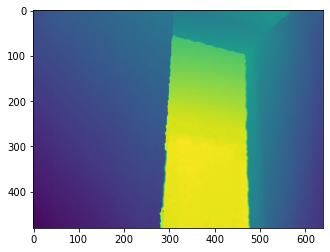

In [7]:
from kinect_smoothing_test import HoleFilling_Filter, Denoising_Filter
hole_filter = HoleFilling_Filter(flag='fmi',max_valid_depth=2000)
hf_image = hole_filter.smooth_image(depth_img)
print('hole filled image frames (filled invalid values)')
plt.imshow(hf_image)
noise_filter = Denoising_Filter(flag='anisotropic',theta=60) 
denoise_image_frame = noise_filter.smooth_image(hf_image)
print('denoised image frames (optional)')
plt.imshow(denoise_image_frame)

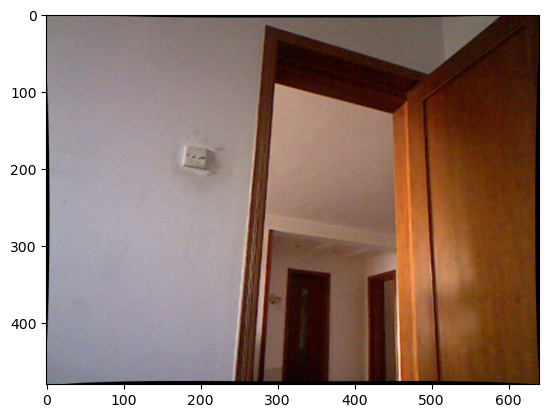

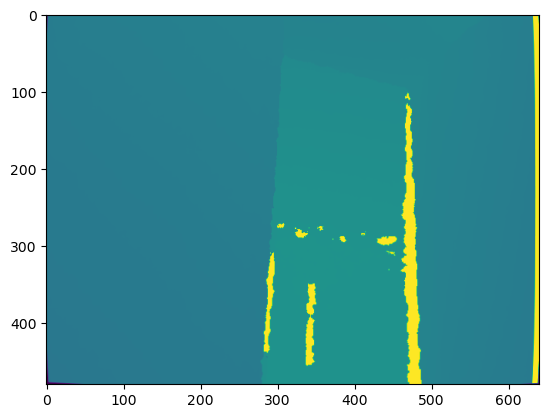

In [1122]:
undistorted_rgb_img = kinect.undistortion(rgb_img,'rgb')
plt.imshow( undistorted_rgb_img[:,:,::-1])
plt.show()
undistorted_depth_img = kinect.undistortion(depth_img,'ir')
plt.imshow( undistorted_depth_img)
plt.show()

In [8]:
# dist = 123.6* np.tan(hf_image/2842.5 + 1.1863 )/1000
dist = 0.075*585/(1090-hf_image)*8


In [9]:
cx_ir = kinect.ir_intrinsic_matrix[0,2]
cy_ir = kinect.ir_intrinsic_matrix[1,2]
fx_ir = kinect.ir_intrinsic_matrix[0,0]
fy_ir = kinect.ir_intrinsic_matrix[1,1]

In [10]:
def pixel2world(x,y,intrinsic_matrix, dist):
    cx = intrinsic_matrix[0,2]
    cy = intrinsic_matrix[1,2]
    fx = intrinsic_matrix[0,0]
    fy = intrinsic_matrix[1,1]
    Z = dist[x,y]
    X = (x - cx) * Z / fx
    Y = (y - cy) * Z / fy
    return X, Y ,Z
    

In [11]:
x = np.tile(np.arange(480), (640, 1))

In [12]:
y = np.tile(np.arange(640).reshape(-1, 1), (1, 480))

In [13]:
X,Y,Z = pixel2world(x,y,kinect.ir_intrinsic_matrix, dist)

In [44]:
points_3d = np.dstack((X, Y, Z))


In [45]:
points_3d=points_3d.reshape(-1,3)


In [46]:
import open3d as o3d
import numpy as np
FOR1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])
# Let's say 'points_3d' is your array of 3D points (numpy array)
# points_3d.shape should be (N, 3), where N is the number of points

# Create an Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points_3d.astype(np.float64))

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd,FOR1])

In [ ]:
points_3d.shape

In [47]:
points_3d = np.append(points_3d.T, np.ones((1,points_3d.shape[0])),axis=0).T

In [48]:
raw_pixel = (kinect.rgb_intrinsic_matrix).dot(kinect.A).dot(points_3d.T).T

# real = raw_pixel[:,:2]/raw_pixel[:,2].reshape(-1,1)

In [49]:
kinect.rgb_intrinsic_matrix

array([[539.02083279,   0.        , 325.62960262],
       [  0.        , 534.86125358, 256.72695373],
       [  0.        ,   0.        ,   1.        ]])

In [50]:
rgb_pixel = (raw_pixel/raw_pixel[:,2].reshape(-1,1)).astype(int)
rgb_pixel[:,0] = np.clip(rgb_pixel[:,0],0,480)
rgb_pixel[:,1] = np.clip(rgb_pixel[:,1],0,639)


<AxesSubplot:ylabel='Frequency'>

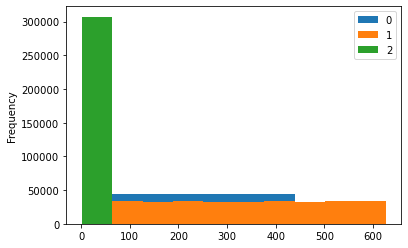

In [51]:
df_rgb_pixel = pd.DataFrame(rgb_pixel)
df_rgb_pixel.plot.hist()

In [52]:
# Threshold value
threshold = 480

# Boolean mask for rows where all elements are less than or equal to the threshold
mask1 = np.all(rgb_pixel[:,:] < 480 )
mask2 = np.all( rgb_pixel[:1] < 640)
mask = mask1 == mask2
# Filtered array
filtered_array = rgb_pixel[mask]

filtered_array.reshape(-1,3)

array([], shape=(0, 3), dtype=int32)

In [53]:
mask1

False

In [54]:
points_3d.shape

(307200, 4)

In [55]:
h = points_3d.shape[0]
points_3d_color  = np.zeros((h,3))

In [56]:
for i,v in enumerate(points_3d):
    if rgb_pixel[i][0]>=480 or rgb_pixel[i][1]>=640:
        pc =  np.array([0,0,0])
    else:
        y,x = rgb_pixel[i][:2]
        pc = rgb_img[y,x]
    points_3d_color[i] = pc
    

In [ ]:
# Creating a point cloud object
pcd = o3d.geometry.PointCloud()

points_3d[:,0] = -points_3d[:,0]
# Assigning the points
pcd.points = o3d.utility.Vector3dVector(points_3d[:, :3])

# Assigning the colors
pcd.colors = o3d.utility.Vector3dVector(points_3d_color[:,[2, 1, 0]]/ 255.0)

# Visualizing the point cloud
o3d.visualization.draw_geometries([pcd])
# Visualize the point cloud
# o3d.visualization.draw_geometries([pcd,FOR1])

In [37]:
points_3d_color

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
P

In [ ]:
P.dot(points_3d).astype(int)


In [ ]:
np.unique(P.dot(points_3d).astype(int)[2,:])